#Condo Price Dataset Preliminary Exploration

This notebook explores the Malaysian Condo Dataset sourced from kaggle

In [19]:
import pandas as pd
import numpy as np

In [20]:
# Original Kaggle link as reference: https://www.kaggle.com/datasets/mcpenguin/raw-malaysian-housing-prices-data?select=houses.csv

df = pd.read_csv("houses.csv")

df.head(5)

,description,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Ad List,Category,Facilities,Building Name,...,REN Number,Bus Stop,Mall,Park,School,Hospital,price,Highway,Nearby Railway Station,Railway Station
0,Iconic Building @ KL SETAPAK\nNew launching & ...,4,2,1000 sq.ft.,Sekolah Menengah Pendidikan Khas Cacat Penglih...,Setapak Central,98187451,"Apartment / Condominium, For sale",-,Kenwingston Platz,...,-,Bus Stop Starparc Point\nBus Stop Setapak Cent...,Setapak Central,"Park at Taman Tasik Danau Kota, Setapak, Kuala...",Sekolah Menengah Pendidikan Khas Cacat Penglih...,Columbia Asia Hospital,RM 340 000,NaN,NaN,NaN
1,"FOR SALE @ RM250,000\nIntroduction:\n~ Pangsap...",3,2,980 sq.ft.,NaN,NaN,101683090,"Apartment / Condominium, For sale","Parking, Security, Swimming Pool, Playground, ...",Kenanga (Park View Court),...,REN 15862,NaN,NaN,NaN,NaN,NaN,RM 250 000,NaN,NaN,NaN
2,"[Below Market] Sri Lavender Apartment,Tmn Sepa...",3,2,1000 sq.ft.,NaN,NaN,103792905,"Apartment / Condominium, For sale","Playground, Minimart, Jogging Track, Barbeque ...",Sri Lavender Apartment,...,-,NaN,NaN,NaN,NaN,NaN,RM 230 000,SILK Sg Ramal (T) Toll Plaza,NaN,NaN
3,Flat Pandan Indah\nJalan Pandan Indah 3/3\nNon...,3,1,592 sq.ft.,NaN,NaN,103806240,"Apartment / Condominium, For sale","Parking, Playground, Minimart, Jogging Track",Flat Pandan Indah,...,REN 16279,NaN,NaN,NaN,NaN,NaN,RM 158 000,NaN,NaN,NaN
4,"* Open-concept Soho with balcony, unblock view...",1,1,467 sq.ft.,Sekolah Jenis Kebangsaan (T) Ladang Midlands,i-Soho i-City,103806234,"Apartment / Condominium, For sale","Minimart, Gymnasium, Parking, Security",i-Soho @ i-City,...,-,Bus Stop at Persiaran Permai 1\nBus Stop at Pe...,i-Soho i-City\nGulati\nCentral i-City Shopping...,"Park 2 at Section 7, Shah Alam\nPark 1 at Sect...",Sekolah Jenis Kebangsaan (T) Ladang Midlands\n...,Osel Clinic (Shah Alam)\nHospital Shah Alam,RM 305 000,NaN,NaN,NaN


In [21]:
# Checking name of all columns
df.columns
# df.shape

Index(['description', 'Bedroom', 'Bathroom', 'Property Size', 'Nearby School',
       'Nearby Mall', 'Ad List', 'Category', 'Facilities', 'Building Name',
       'Developer', 'Tenure Type', 'Address', 'Completion Year', '# of Floors',
       'Total Units', 'Property Type', 'Parking Lot', 'Floor Range',
       'Land Title', 'Firm Type', 'Firm Number', 'REN Number', 'Bus Stop',
       'Mall', 'Park', 'School', 'Hospital', 'price', 'Highway',
       'Nearby Railway Station', 'Railway Station'],
      dtype='object')

## Initial Exploration

Some initial data exploration and inspection is performed on the dataset to understand it better.

In [22]:
# Display the first 50 unique values for each column (becase there are just too many values)
for column in df.columns:
    unique_values = df[column].head(50).unique()
    print(f"Column '{column}': {unique_values}")

Column 'description': ['Iconic Building @ KL SETAPAK\nNew launching & Latest condo !!!!! 🔥\nHouse with luxury hotel concept 😍👑\n💎 Freehold\n🔑 Dual key\n🛌 2 / 3 / 4 rooms\n💰Affordable and Low entry price\n💼 100% full furnish, move in with a luggage\nWhatsapp / Call \nShow contact number\n ( Eugine ) for more details & showroom viewing 🔥\nWhatsapp / Call \nShow contact number\n ( Eugine ) for more details & showroom viewing 🔥\nWhatsapp / Call \nShow contact number\n ( Eugine ) for more details & showroom viewing 🔥\nWhatsapp link :\nhttps://hotnewcondo.wasap.my\nhttps://hotnewcondo.wasap.my\nhttps://hotnewcondo.wasap.my\n🏝5 🌟 facilities : Sky lounge, Sky bridge, Sky garden\n🚗 6km to KLCC/ Bkt Bintang\n🍱 Food Heaven\n📈 Freehold Appreciation\n👑 Luxury Hotel Drop-off Lobby\n🏊🏻 Infinity Pool\n🏡 Sky Garden, Sky Lounge, Sky bridge\nFacilities:\nLevel 10 – Elevated lawn for Yoga, Jogging Trail, Jacuzzi, Infinity Pool, Wading Pool, Pool Deck, Play land, Sunbathe Terrace, Sun Lounge, Gymnamsium, V

##Initial Cleaning

In [23]:
# df.price.unique()

# Remove 'RM' and spaces, then convert to integers
df['price'] = df['price'].str.replace('RM ', '').str.replace(' ', '').astype(int)
# Remove non-numeric characters and convert to integers
df['Property Size'] = df['Property Size'].str.replace('[^\d]', '', regex=True).astype(int)

df['Bedroom'] = df['Bedroom'].replace('-', np.nan).astype(float).astype('Int64')
df['Bathroom'] = df['Bathroom'].replace('-', np.nan).astype(float).astype('Int64')
df['Completion Year'] = df['Completion Year'].replace('-', np.nan).astype(float).astype('Int64')
df['# of Floors'] = df['# of Floors'].replace('-', np.nan).astype(float).astype('Int64')
df['Total Units'] = df['Total Units'].replace('-', np.nan).astype(float).astype('Int64')
df['Parking Lot'] = df['Parking Lot'].replace('-', np.nan).astype(float).astype('Int64')

#Cleaning up value
df['Floor Range'] = df['Floor Range'].replace('-', 'Not Specified')
df['Address'] = df['Address'].replace('-', np.nan)

#Remove irrelevant columns
print(df.columns)
columns_to_drop = ['Ad List', 'REN Number','Firm Type','Firm Number']
df = df.drop(columns= columns_to_drop)


print("")
print(df.columns)
# Print the updated DataFrame
df.head(5)

Index(['description', 'Bedroom', 'Bathroom', 'Property Size', 'Nearby School',
       'Nearby Mall', 'Ad List', 'Category', 'Facilities', 'Building Name',
       'Developer', 'Tenure Type', 'Address', 'Completion Year', '# of Floors',
       'Total Units', 'Property Type', 'Parking Lot', 'Floor Range',
       'Land Title', 'Firm Type', 'Firm Number', 'REN Number', 'Bus Stop',
       'Mall', 'Park', 'School', 'Hospital', 'price', 'Highway',
       'Nearby Railway Station', 'Railway Station'],
      dtype='object')

Index(['description', 'Bedroom', 'Bathroom', 'Property Size', 'Nearby School',
       'Nearby Mall', 'Category', 'Facilities', 'Building Name', 'Developer',
       'Tenure Type', 'Address', 'Completion Year', '# of Floors',
       'Total Units', 'Property Type', 'Parking Lot', 'Floor Range',
       'Land Title', 'Bus Stop', 'Mall', 'Park', 'School', 'Hospital', 'price',
       'Highway', 'Nearby Railway Station', 'Railway Station'],
      dtype='object')


,description,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Category,Facilities,Building Name,Developer,...,Land Title,Bus Stop,Mall,Park,School,Hospital,price,Highway,Nearby Railway Station,Railway Station
0,Iconic Building @ KL SETAPAK\nNew launching & ...,4,2,1000,Sekolah Menengah Pendidikan Khas Cacat Penglih...,Setapak Central,"Apartment / Condominium, For sale",-,Kenwingston Platz,Kenwingston Group,...,Non Bumi Lot,Bus Stop Starparc Point\nBus Stop Setapak Cent...,Setapak Central,"Park at Taman Tasik Danau Kota, Setapak, Kuala...",Sekolah Menengah Pendidikan Khas Cacat Penglih...,Columbia Asia Hospital,340000,NaN,NaN,NaN
1,"FOR SALE @ RM250,000\nIntroduction:\n~ Pangsap...",3,2,980,NaN,NaN,"Apartment / Condominium, For sale","Parking, Security, Swimming Pool, Playground, ...",Kenanga (Park View Court),-,...,Non Bumi Lot,NaN,NaN,NaN,NaN,NaN,250000,NaN,NaN,NaN
2,"[Below Market] Sri Lavender Apartment,Tmn Sepa...",3,2,1000,NaN,NaN,"Apartment / Condominium, For sale","Playground, Minimart, Jogging Track, Barbeque ...",Sri Lavender Apartment,TLS Group,...,Non Bumi Lot,NaN,NaN,NaN,NaN,NaN,230000,SILK Sg Ramal (T) Toll Plaza,NaN,NaN
3,Flat Pandan Indah\nJalan Pandan Indah 3/3\nNon...,3,1,592,NaN,NaN,"Apartment / Condominium, For sale","Parking, Playground, Minimart, Jogging Track",Flat Pandan Indah,-,...,Non Bumi Lot,NaN,NaN,NaN,NaN,NaN,158000,NaN,NaN,NaN
4,"* Open-concept Soho with balcony, unblock view...",1,1,467,Sekolah Jenis Kebangsaan (T) Ladang Midlands,i-Soho i-City,"Apartment / Condominium, For sale","Minimart, Gymnasium, Parking, Security",i-Soho @ i-City,i-Berhad,...,Bumi Lot,Bus Stop at Persiaran Permai 1\nBus Stop at Pe...,i-Soho i-City\nGulati\nCentral i-City Shopping...,"Park 2 at Section 7, Shah Alam\nPark 1 at Sect...",Sekolah Jenis Kebangsaan (T) Ladang Midlands\n...,Osel Clinic (Shah Alam)\nHospital Shah Alam,305000,NaN,NaN,NaN


In [24]:
print(df.shape)
df.isnull().sum()

(4000, 28)


description                  0
Bedroom                      1
Bathroom                     1
Property Size                0
Nearby School             3313
Nearby Mall               3635
Category                     0
Facilities                   0
Building Name                0
Developer                    0
Tenure Type                  0
Address                     87
Completion Year           2021
# of Floors               1749
Total Units               1902
Property Type                0
Parking Lot               1219
Floor Range                  0
Land Title                   0
Bus Stop                  3292
Mall                      3525
Park                      3193
School                    3052
Hospital                  3657
price                        0
Highway                   3859
Nearby Railway Station    3637
Railway Station           3515
dtype: int64

In [25]:
# # Create a boolean mask for null values
# null_mask = df.isnull()

# # Filter rows where null values occur
# df_with_nulls = df[null_mask.any(axis=1)]

# # df_with_nulls.to_csv("df_with_nulls.csv")

In [26]:
# df.dtypes
df.describe()

,Bedroom,Bathroom,Property Size,Completion Year,# of Floors,Total Units,Parking Lot,price
count,3999.000000,3999.000000,4000.000000,1979.000000,2251.000000,2098.000000,2781.000000,4.000000e+03
mean,2.917229,2.019755,1035.049000,2011.383527,21.650378,614.005243,1.506652,4.218269e+05
std,0.691838,0.607490,2012.250439,8.001577,25.792521,591.703145,0.700238,3.286249e+05
min,1.000000,1.000000,1.000000,1985.000000,2.000000,1.000000,1.000000,3.800000e+04
25%,3.000000,2.000000,750.000000,2006.000000,12.000000,290.000000,1.000000,2.500000e+05
50%,3.000000,2.000000,900.000000,2014.000000,20.000000,462.000000,1.000000,3.500000e+05
75%,3.000000,2.000000,1120.000000,2017.000000,27.000000,753.500000,2.000000,4.900000e+05
max,10.000000,8.000000,122774.000000,2026.000000,504.000000,7810.000000,10.000000,6.016000e+06


# Exploratory Data Analysis (EDA)

EDA is perfomed on the dataset to investigate relationships between variables

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
from IPython.display import display

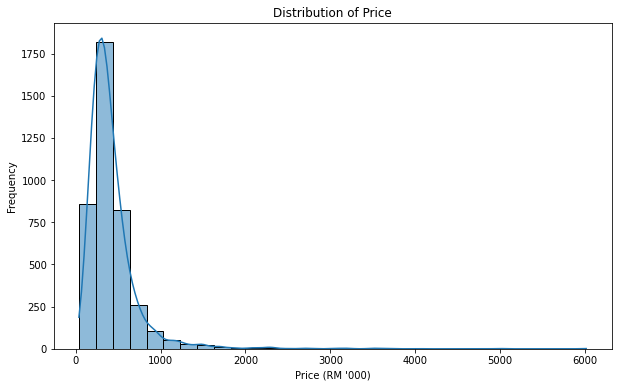

In [28]:
# Histogram with x-axis labels in thousands
plt.figure(figsize=(10, 6))
sns.histplot(df['price'] / 1000, bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price (RM \'000)')
plt.ylabel('Frequency')
plt.show()

## Numerical columns

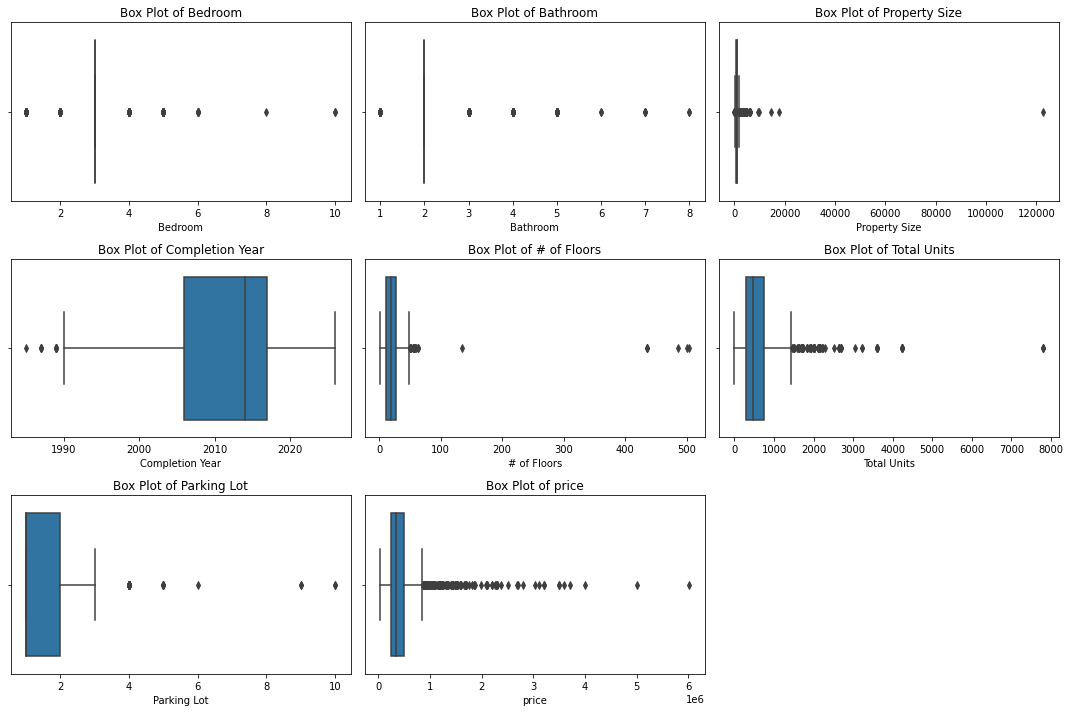

In [29]:
# Defining numerical and categorical columns

numerical_columns = ['Bedroom', 'Bathroom', 'Property Size', 'Completion Year', '# of Floors', 'Total Units', 'Parking Lot', 'price']

categorical_columns = ['description', 'Nearby School', 'Nearby Mall', 'Category', 'Facilities', 'Building Name', 'Developer', 'Tenure Type', 'Address', 'Property Type', 'Floor Range', 'Land Title', 'Bus Stop', 'Mall', 'Park', 'School', 'Hospital', 'Highway', 'Nearby Railway Station', 'Railway Station']


# Calculate the number of rows and columns needed for the subplot grid
num_columns = 3
num_rows = math.ceil(len(numerical_columns) / num_columns)

# Create subplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()


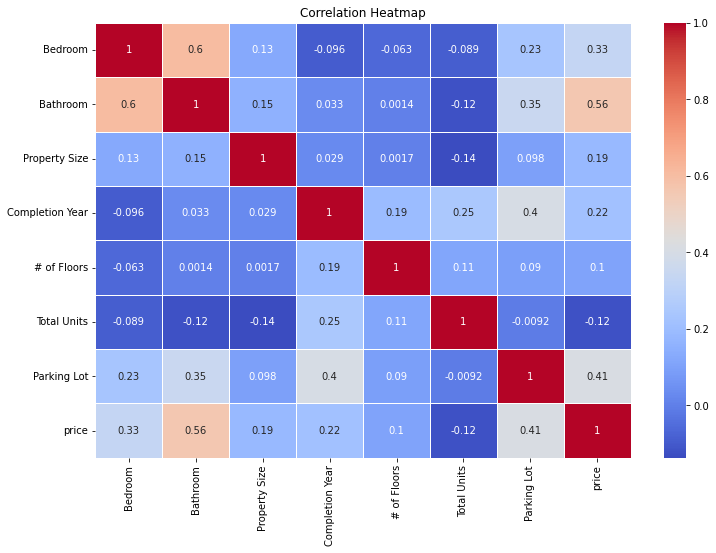

In [30]:
# Correlation matrix
correlation_matrix = df.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

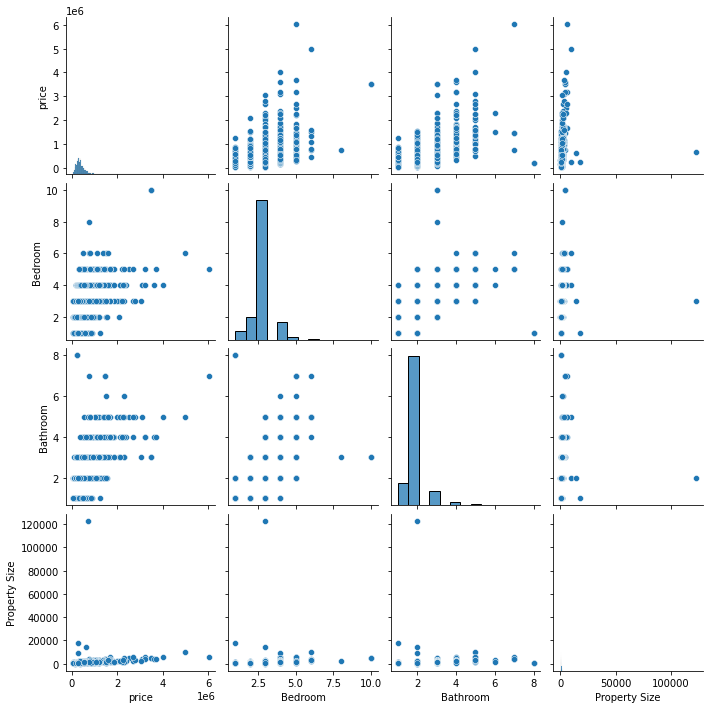

In [31]:
# Pair plot
sns.pairplot(df[['price', 'Bedroom', 'Bathroom', 'Property Size']])
plt.show()

## Categorical Columns

In [32]:
# Unique Values
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")



Unique values in description: ['Iconic Building @ KL SETAPAK\nNew launching & Latest condo !!!!! 🔥\nHouse with luxury hotel concept 😍👑\n💎 Freehold\n🔑 Dual key\n🛌 2 / 3 / 4 rooms\n💰Affordable and Low entry price\n💼 100% full furnish, move in with a luggage\nWhatsapp / Call \nShow contact number\n ( Eugine ) for more details & showroom viewing 🔥\nWhatsapp / Call \nShow contact number\n ( Eugine ) for more details & showroom viewing 🔥\nWhatsapp / Call \nShow contact number\n ( Eugine ) for more details & showroom viewing 🔥\nWhatsapp link :\nhttps://hotnewcondo.wasap.my\nhttps://hotnewcondo.wasap.my\nhttps://hotnewcondo.wasap.my\n🏝5 🌟 facilities : Sky lounge, Sky bridge, Sky garden\n🚗 6km to KLCC/ Bkt Bintang\n🍱 Food Heaven\n📈 Freehold Appreciation\n👑 Luxury Hotel Drop-off Lobby\n🏊🏻 Infinity Pool\n🏡 Sky Garden, Sky Lounge, Sky bridge\nFacilities:\nLevel 10 – Elevated lawn for Yoga, Jogging Trail, Jacuzzi, Infinity Pool, Wading Pool, Pool Deck, Play land, Sunbathe Terrace, Sun Lounge, Gymna

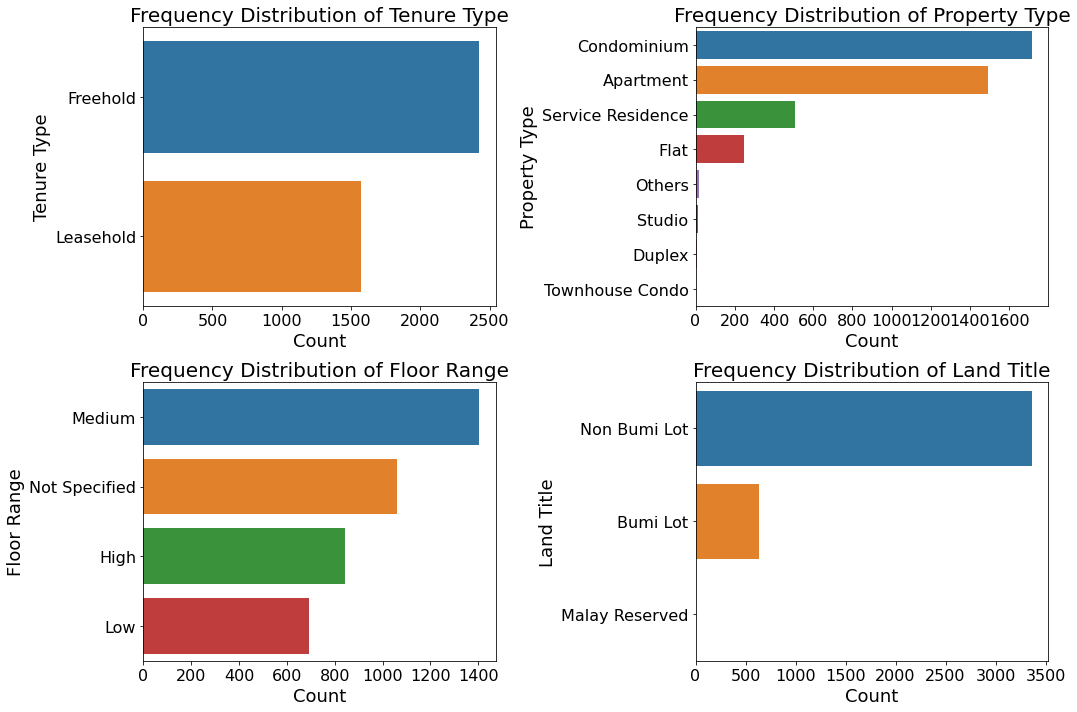

In [33]:
# # Frequency Distribution

# Visualise all categorical columns (Too many)
# plt.figure(figsize=(14, 8))
# for column in categorical_columns:
#     sns.countplot(y=df[column], order=df[column].value_counts().index, orient='h')
#     plt.title(column)
#     plt.show()



# Specify the categorical columns you want to visualize
selected_categorical_columns = ['Tenure Type', 'Property Type', 'Floor Range', 'Land Title']

# Calculate the number of rows and columns needed for the subplot grid
num_columns = 2
num_rows = math.ceil(len(selected_categorical_columns) / num_columns)

# Create subplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(selected_categorical_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.countplot(y=df[column], order=df[column].value_counts().index, orient='h')
    plt.title(f'Frequency Distribution of {column}', fontsize=20)

    plt.xlabel('Count', fontsize=18)
    plt.ylabel(column, fontsize=18)

    # Increase font size of tick labels on both axes
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

plt.tight_layout()
plt.show()



In [34]:

# Cross Tabulation (raw count)
# for column1 in selected_categorical_columns:
#     for column2 in selected_categorical_columns:
#         if column1 != column2:
#             cross_tab = pd.crosstab(df[column1], df[column2])
#             display(cross_tab.style.set_caption(f"Cross Tabulation between {column1} and {column2}"))
#             print("")



import seaborn as sns


# Cross Tabulation and Display in Tables
for column1 in selected_categorical_columns:
    for column2 in selected_categorical_columns:
        if column1 != column2:
            cross_tab = pd.crosstab(df[column1], df[column2], normalize='index') * 100
            styled_cross_tab = cross_tab.style.format("{:.1f}%")

            # Display in a Jupyter Notebook
            display(styled_cross_tab.set_caption(f"Cross Tabulation (Percentage) between {column1} and {column2}"))
            print("")






Property Type,Apartment,Condominium,Duplex,Flat,Others,Service Residence,Studio,Townhouse Condo
Tenure Type,,,,,,,,
Freehold,33.1%,48.0%,0.1%,5.2%,0.2%,12.8%,0.3%,0.2%
Leasehold,43.8%,34.9%,0.2%,7.6%,0.7%,12.4%,0.3%,0.0%


Floor Range,High,Low,Medium,Not Specified
Tenure Type,,,,
Freehold,22.1%,17.4%,34.0%,26.4%
Leasehold,19.4%,17.0%,36.8%,26.7%


Land Title,Bumi Lot,Malay Reserved,Non Bumi Lot
Tenure Type,,,
Freehold,9.6%,0.2%,90.2%
Leasehold,25.3%,0.2%,74.5%


Tenure Type,Freehold,Leasehold
Property Type,,
Apartment,53.8%,46.2%
Condominium,67.9%,32.1%
Duplex,40.0%,60.0%
Flat,51.4%,48.6%
Others,35.3%,64.7%
Service Residence,61.5%,38.5%
Studio,61.5%,38.5%
Townhouse Condo,100.0%,0.0%


Floor Range,High,Low,Medium,Not Specified
Property Type,,,,
Apartment,17.9%,22.0%,35.1%,25.0%
Condominium,22.7%,14.1%,34.7%,28.6%
Duplex,0.0%,40.0%,40.0%,20.0%
Flat,25.9%,25.5%,31.2%,17.4%
Others,5.9%,17.6%,23.5%,52.9%
Service Residence,23.5%,9.7%,38.9%,27.9%
Studio,23.1%,7.7%,38.5%,30.8%
Townhouse Condo,0.0%,75.0%,0.0%,25.0%


Land Title,Bumi Lot,Malay Reserved,Non Bumi Lot
Property Type,,,
Apartment,22.2%,0.2%,77.6%
Condominium,10.9%,0.2%,89.0%
Duplex,0.0%,40.0%,60.0%
Flat,27.5%,0.0%,72.5%
Others,17.6%,0.0%,82.4%
Service Residence,8.1%,0.0%,91.9%
Studio,15.4%,0.0%,84.6%
Townhouse Condo,0.0%,0.0%,100.0%


Tenure Type,Freehold,Leasehold
Floor Range,,
High,63.7%,36.3%
Low,61.2%,38.8%
Medium,58.8%,41.2%
Not Specified,60.4%,39.6%


Property Type,Apartment,Condominium,Duplex,Flat,Others,Service Residence,Studio,Townhouse Condo
Floor Range,,,,,,,,
High,31.7%,46.1%,0.0%,7.6%,0.1%,14.1%,0.4%,0.0%
Low,47.6%,34.9%,0.3%,9.1%,0.4%,7.1%,0.1%,0.4%
Medium,37.4%,42.3%,0.1%,5.5%,0.3%,14.0%,0.4%,0.0%
Not Specified,35.1%,46.1%,0.1%,4.0%,0.8%,13.3%,0.4%,0.1%


Land Title,Bumi Lot,Malay Reserved,Non Bumi Lot
Floor Range,,,
High,16.5%,0.0%,83.5%
Low,21.0%,0.7%,78.3%
Medium,17.7%,0.1%,82.2%
Not Specified,9.4%,0.1%,90.5%


Tenure Type,Freehold,Leasehold
Land Title,,
Bumi Lot,36.9%,63.1%
Malay Reserved,62.5%,37.5%
Non Bumi Lot,65.1%,34.9%


Property Type,Apartment,Condominium,Duplex,Flat,Others,Service Residence,Studio,Townhouse Condo
Land Title,,,,,,,,
Bumi Lot,52.5%,29.4%,0.0%,10.8%,0.5%,6.5%,0.3%,0.0%
Malay Reserved,37.5%,37.5%,25.0%,0.0%,0.0%,0.0%,0.0%,0.0%
Non Bumi Lot,34.5%,45.4%,0.1%,5.3%,0.4%,13.8%,0.3%,0.1%


Floor Range,High,Low,Medium,Not Specified
Land Title,,,,
Bumi Lot,22.0%,22.9%,39.2%,15.8%
Malay Reserved,0.0%,62.5%,25.0%,12.5%
Non Bumi Lot,21.0%,16.1%,34.3%,28.6%


In [35]:
df.columns

Index(['description', 'Bedroom', 'Bathroom', 'Property Size', 'Nearby School',
       'Nearby Mall', 'Category', 'Facilities', 'Building Name', 'Developer',
       'Tenure Type', 'Address', 'Completion Year', '# of Floors',
       'Total Units', 'Property Type', 'Parking Lot', 'Floor Range',
       'Land Title', 'Bus Stop', 'Mall', 'Park', 'School', 'Hospital', 'price',
       'Highway', 'Nearby Railway Station', 'Railway Station'],
      dtype='object')

## Further Cleaning

Some further cleaning is done after understanding the data a little bit more

In [36]:
# Define a list of states in Malaysia
states_list = ['Selangor', 'Penang', 'Melaka', 'Sabah', 'Johor', 'Sarawak', 'Perak', 'Negeri Sembilan', 'Kedah',
               'Terengganu', 'Pahang', 'Kelantan', 'Perlis', 'Kuala Lumpur', 'Putrajaya', 'Labuan']



# Extract district and state names
df['district_state'] = df['Address'].str.extract(r',\s*([^,]+,\s*[^,]+)$')

# Extract state from district_state  based on the list of states
df['state'] = df['district_state'].apply(lambda x: next((state for state in states_list if state.lower() in str(x).lower()), x))



df.district_state.unique()
df.state.unique()
# len(df.state.unique())

array(['Kuala Lumpur', 'Melaka', 'Selangor', 'Penang', 'Johor', 'Sarawak',
       nan, 'Putrajaya', 'Perak', 'Negeri Sembilan', 'Sabah', 'Pahang',
       'Terengganu', 'Kelantan', 'Labuan', 'Kedah'], dtype=object)

In [37]:
#Checking
# print(df.shape)
# df.isnull().sum()

In [38]:
nan_rows = df[df['state'].isna()]

nan_rows.Address.unique()

# it seems that all null values in s'tate' is caused by the values in Address being null. It is decided that these null rows to be dropped.

# Drop rows with NaN values in the 'state',  column
df = df.dropna(subset=['state'])

# Drop columns that have been identified as no too influential. Parking Lot is also dropped at this point in favour of keeping most rows. Future improvement to look at would be feature engineering that allows parking information is also captured.
# Drop specified columns
columns_to_drop2 = ['Completion Year', '# of Floors', 'Total Units','Parking Lot', 'description', 'district_state']
df = df.drop(columns=columns_to_drop2)


print(df.shape)
df.isnull().sum()



(3913, 24)


Bedroom                      0
Bathroom                     0
Property Size                0
Nearby School             3226
Nearby Mall               3548
Category                     0
Facilities                   0
Building Name                0
Developer                    0
Tenure Type                  0
Address                      0
Property Type                0
Floor Range                  0
Land Title                   0
Bus Stop                  3205
Mall                      3438
Park                      3106
School                    2965
Hospital                  3570
price                        0
Highway                   3772
Nearby Railway Station    3550
Railway Station           3428
state                        0
dtype: int64

# Preprocessing

Data is split into train and test set, encoded and scaled as a preparation for machine learning modelling

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [40]:
# Separate features (X) and target variable (y)
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Define preprocessing steps for numeric and categorical data
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create a pipeline with preprocessing steps
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply the preprocessing pipeline to the training set
X_train_preprocessed = pipeline.fit_transform(X_train)

# Apply the same preprocessing pipeline to the testing set (no fitting)
X_test_preprocessed = pipeline.transform(X_test)

# Machine learning modelling

Preprocessed data was trained using DecisionTreeRegressor, RandomForestRegressor and SupportVectorRegressor (SVR)

## Decision Tree Regressor

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor  # Use a simpler model for initial search
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, median_absolute_error, mean_squared_log_error



# Define a simpler model for initial search
model = DecisionTreeRegressor()

# Define a reduced search space
param_distributions = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Use RandomizedSearchCV with the reduced search space and a smaller number of iterations
randomized_search = RandomizedSearchCV(model, param_distributions, n_iter=5, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
randomized_search.fit(X_train_preprocessed, y_train)

# Print the best hyperparameters
print(f"Best hyperparameters: {randomized_search.best_params_}")

# Predict on the testing set
y_pred = randomized_search.predict(X_test_preprocessed)

# Evaluate the model using various metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)

# Print the evaluation metrics
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")
print(f"MAE: {mae}")
print(f"Explained Variance Score: {evs}")
print(f"Median Absolute Error: {medae}")
print(f"MSLE: {msle}")

Best hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}
MSE: 65652475031.249405
RMSE: 256227.38930732873
R^2: 0.4731964256659247
MAE: 116450.43497551855
Explained Variance Score: 0.47331488552965906
Median Absolute Error: 64973.45806451613
MSLE: 0.11782437281278105


## Random Forest Regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest model
rf_model = RandomForestRegressor()

# Use RandomizedSearchCV for hyperparameter tuning
randomized_search_rf = RandomizedSearchCV(
    rf_model, param_distributions, n_iter=5, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

# Fit the model on the preprocessed training set
randomized_search_rf.fit(X_train_preprocessed, y_train)

# Print the best hyperparameters
print("Random Forest Best hyperparameters:", randomized_search_rf.best_params_)

# Predict on the testing set
y_pred_rf = randomized_search_rf.predict(X_test_preprocessed)

# Evaluate the model using various metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
evs_rf = explained_variance_score(y_test, y_pred_rf)
medae_rf = median_absolute_error(y_test, y_pred_rf)
msle_rf = mean_squared_log_error(y_test, y_pred_rf)

# Print the evaluation metrics
print("Random Forest MSE:", mse_rf)
print("Random Forest RMSE:", rmse_rf)
print("Random Forest R^2:", r2_rf)
print("Random Forest MAE:", mae_rf)
print("Random Forest Explained Variance Score:", evs_rf)
print("Random Forest Median Absolute Error:", medae_rf)
print("Random Forest MSLE:", msle_rf)

Random Forest Best hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Random Forest MSE: 52163077348.24725
Random Forest RMSE: 228392.37585402725
Random Forest R^2: 0.5814370199715753
Random Forest MAE: 88973.18477062175
Random Forest Explained Variance Score: 0.585245188237407
Random Forest Median Absolute Error: 43568.0
Random Forest MSLE: 0.08161206026616552


## Support Vector Regression (SVR)

In [43]:
from sklearn.svm import SVR

# Define the SVR model
svr_model = SVR()

# Define the hyperparameter search space for SVR
param_distributions_svr = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Use RandomizedSearchCV for hyperparameter tuning
randomized_search_svr = RandomizedSearchCV(
    svr_model, param_distributions_svr, n_iter=5, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

# Fit the model on the preprocessed training set
randomized_search_svr.fit(X_train_preprocessed, y_train)

# Print the best hyperparameters
print("SVR Best hyperparameters:", randomized_search_svr.best_params_)

# Predict on the testing set
y_pred_svr = randomized_search_svr.predict(X_test_preprocessed)

# Evaluate the model using various metrics
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
evs_svr = explained_variance_score(y_test, y_pred_svr)
medae_svr = median_absolute_error(y_test, y_pred_svr)
msle_svr = mean_squared_log_error(y_test, y_pred_svr)

# Print the evaluation metrics
print("SVR MSE:", mse_svr)
print("SVR RMSE:", rmse_svr)
print("SVR R^2:", r2_svr)
print("SVR MAE:", mae_svr)
print("SVR Explained Variance Score:", evs_svr)
print("SVR Median Absolute Error:", medae_svr)
print("SVR MSLE:", msle_svr)


SVR Best hyperparameters: {'kernel': 'linear', 'gamma': 'scale', 'epsilon': 0.2, 'C': 10}
SVR MSE: 122097267584.54478
SVR RMSE: 349424.1943319678
SVR R^2: 0.020276433609754285
SVR MAE: 167313.434728979
SVR Explained Variance Score: 0.06113828246791875
SVR Median Absolute Error: 107133.22205804993
SVR MSLE: 0.27113515150466605


# Testing on new data

In [44]:
# Test on New data:

# Create a DataFrame with new input values
new_data = pd.DataFrame({
    'Bedroom': [3],
    'Bathroom': [2],
    'Property Size': [1300],
    'Nearby School': ['Yes'],
    'Nearby Mall': ['Yes'],
    'Category': ['Residential'],
    'Facilities': ['Swimming Pool'],
    'Building Name': ['New Condo'],
    'Developer': ['ABC Developers'],
    'Tenure Type': ['Freehold'],
    'Address': ['Jalan Sg Besi, Kuala Lumpur'],
    'Completion Year': [2025],
    'Parking Lot': ['2'],
    'Floor Range': ['Mid Floor'],
    'Land Title': ['Residential'],
    'Bus Stop': ['Yes'],
    'Mall': ['Yes'],
    'Park': ['Yes'],
    'School': ['Yes'],
    'Hospital': ['No'],
    'Highway': ['Yes'],
    'Nearby Railway Station': ['No'],
    'Railway Station': [''],
    'state': ['Kuala Lumpur'],
    'description': ['Mid'],
    'Property Type': ['Condominium'],
    'district_state': ['Kuala Lumpur']

})

# Preprocess the new data using the same preprocessing pipeline
new_data_preprocessed = pipeline.transform(new_data)

# Make predictions using the SVR model
# predicted_prices = randomized_search_svr.predict(new_data_preprocessed)

predicted_price =  randomized_search_rf.predict(new_data_preprocessed)

# Display the predicted price
print("Predicted Price:")
print(predicted_price)

Predicted Price:
[389929.99]
